In [1]:
import pandas as pd

gl_data = pd.read_excel('/Users/katarinabaksiova/Desktop/partory/GL.xlsx')

gl_data['Datum'] = pd.to_datetime(gl_data['Datum'])
gl_data = gl_data[gl_data['Datum'].dt.year == 2024]

gl_data['MD'] = gl_data['MD'].astype(str)
gl_data['DAL'] = gl_data['DAL'].astype(str)

naklady_md = gl_data[gl_data['MD'].str.startswith('5')]
naklady_dal = gl_data[gl_data['DAL'].str.startswith('5')]

vynosy_dal = gl_data[gl_data['DAL'].str.startswith('6')]
vynosy_md = gl_data[gl_data['MD'].str.startswith('6')]

celkove_naklady = naklady_md['Částka'].sum() + naklady_dal['Částka'].sum()
celkove_vynosy = vynosy_dal['Částka'].sum() + vynosy_md['Částka'].sum()
cisty_vysledek = celkove_vynosy - celkove_naklady

print("Souhrn nákladů:")
print("Celkové náklady na straně MD (všechny hodnoty):", naklady_md['Částka'].sum())
print("Celkové náklady na straně DAL (všechny hodnoty):", naklady_dal['Částka'].sum())

print("\nSouhrn výnosů:")
print("Celkové výnosy na straně DAL (všechny hodnoty):", vynosy_dal['Částka'].sum())
print("Celkové výnosy na straně MD (všechny hodnoty):", vynosy_md['Částka'].sum())

print("\nVýsledný přehled pro Výkaz zisku a ztráty:")
print("Celkové výnosy:", celkove_vynosy)
print("Celkové náklady:", celkove_naklady)
print("Čistý výsledek hospodaření (Net Income):", cisty_vysledek)

income_statement = pd.DataFrame({
    'Category': ['Total Revenue', 'Total Expenses', 'Net Income'],
    'Amount': [celkove_vynosy, celkove_naklady, cisty_vysledek]
})

income_statement.to_excel('/Users/katarinabaksiova/Desktop/partory/income_statement_detailed_corrected.xlsx', index=False)


Souhrn nákladů:
Celkové náklady na straně MD (všechny hodnoty): 18890101.85
Celkové náklady na straně DAL (všechny hodnoty): -117580.11

Souhrn výnosů:
Celkové výnosy na straně DAL (všechny hodnoty): 16606434.22
Celkové výnosy na straně MD (všechny hodnoty): 0.0

Výsledný přehled pro Výkaz zisku a ztráty:
Celkové výnosy: 16606434.22
Celkové náklady: 18772521.740000002
Čistý výsledek hospodaření (Net Income): -2166087.5200000014


In [2]:
print(gl_data.columns)


Index(['Datum', 'Číslo', 'MD', 'DAL', 'Částka', 'Středisko'], dtype='object')


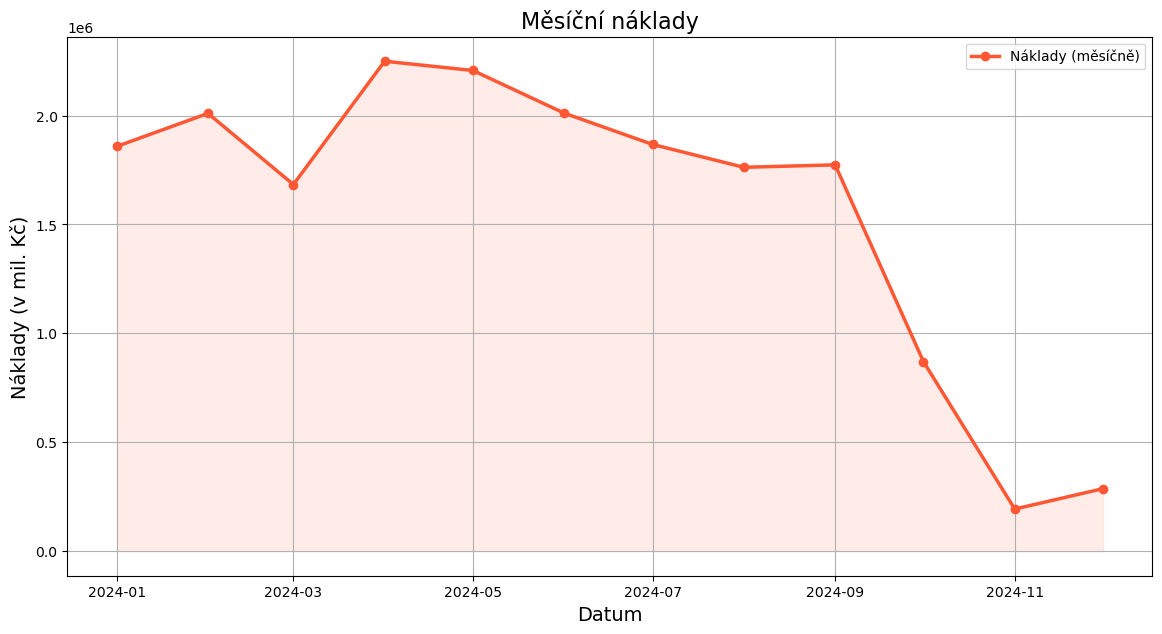

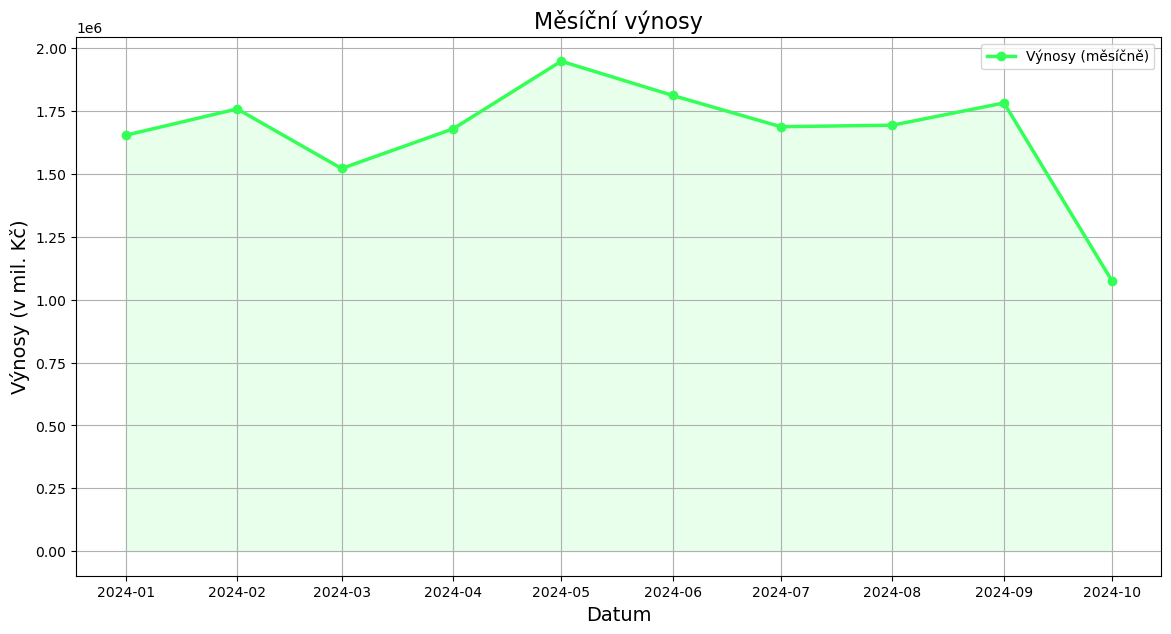

In [3]:
import matplotlib.pyplot as plt

gl_data['Měsíc'] = gl_data['Datum'].dt.to_period('M')

mesicni_naklady = gl_data[gl_data['MD'].str.startswith('5') | gl_data['DAL'].str.startswith('5')].groupby('Měsíc')['Částka'].sum().reset_index()
mesicni_vynosy = gl_data[gl_data['MD'].str.startswith('6') | gl_data['DAL'].str.startswith('6')].groupby('Měsíc')['Částka'].sum().reset_index()

mesicni_naklady['Měsíc'] = mesicni_naklady['Měsíc'].dt.to_timestamp()
mesicni_vynosy['Měsíc'] = mesicni_vynosy['Měsíc'].dt.to_timestamp()

plt.figure(figsize=(14, 7))
plt.plot(mesicni_naklady['Měsíc'], mesicni_naklady['Částka'], color='#FF5733', linewidth=2.5, marker='o', label='Náklady (měsíčně)')
plt.fill_between(mesicni_naklady['Měsíc'], mesicni_naklady['Částka'], color='#FFC3B3', alpha=0.3)
plt.xlabel('Datum', fontsize=14)
plt.ylabel('Náklady (v mil. Kč)', fontsize=14)
plt.title('Měsíční náklady', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(mesicni_vynosy['Měsíc'], mesicni_vynosy['Částka'], color='#33FF57', linewidth=2.5, marker='o', label='Výnosy (měsíčně)')
plt.fill_between(mesicni_vynosy['Měsíc'], mesicni_vynosy['Částka'], color='#B3FFC3', alpha=0.3)
plt.xlabel('Datum', fontsize=14)
plt.ylabel('Výnosy (v mil. Kč)', fontsize=14)
plt.title('Měsíční výnosy', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()


In [4]:
!pip install seaborn


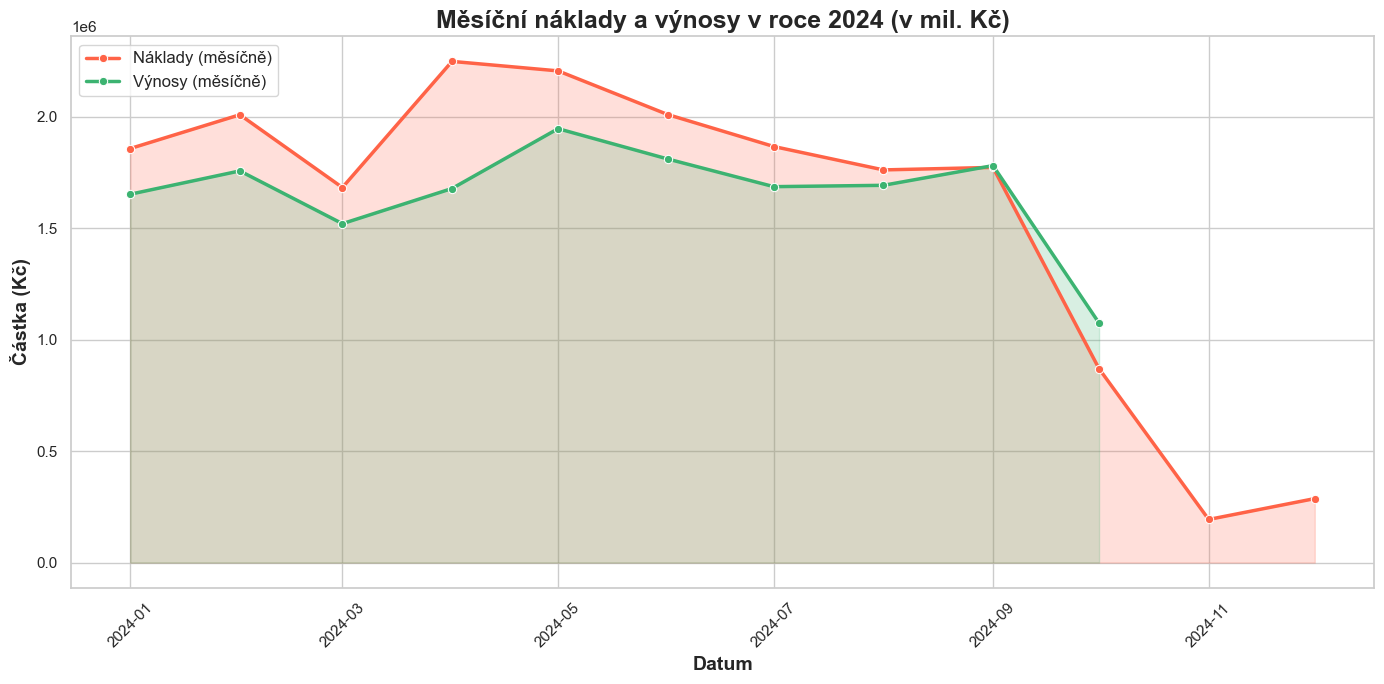

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrované hodnoty pouze pro rok 2024
mesicni_naklady_2024 = mesicni_naklady[mesicni_naklady['Měsíc'].dt.year == 2024]
mesicni_vynosy_2024 = mesicni_vynosy[mesicni_vynosy['Měsíc'].dt.year == 2024]

sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(14, 7))

sns.lineplot(x='Měsíc', y='Částka', data=mesicni_naklady_2024, label='Náklady (měsíčně)', color="tomato", marker='o', linewidth=2.5)
plt.fill_between(mesicni_naklady_2024['Měsíc'], mesicni_naklady_2024['Částka'], color="tomato", alpha=0.2)

sns.lineplot(x='Měsíc', y='Částka', data=mesicni_vynosy_2024, label='Výnosy (měsíčně)', color="mediumseagreen", marker='o', linewidth=2.5)
plt.fill_between(mesicni_vynosy_2024['Měsíc'], mesicni_vynosy_2024['Částka'], color="mediumseagreen", alpha=0.2)

plt.title('Měsíční náklady a výnosy v roce 2024 (v mil. Kč)', fontsize=18, fontweight='bold')
plt.xlabel('Datum', fontsize=14, fontweight='bold')
plt.ylabel('Částka (Kč)', fontsize=14, fontweight='bold')

plt.legend(loc='upper left', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


/var/folders/x0/jzgppjhs6dgfl1lhhvbv5x300000gn/T/ipykernel_42848/3042358967.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


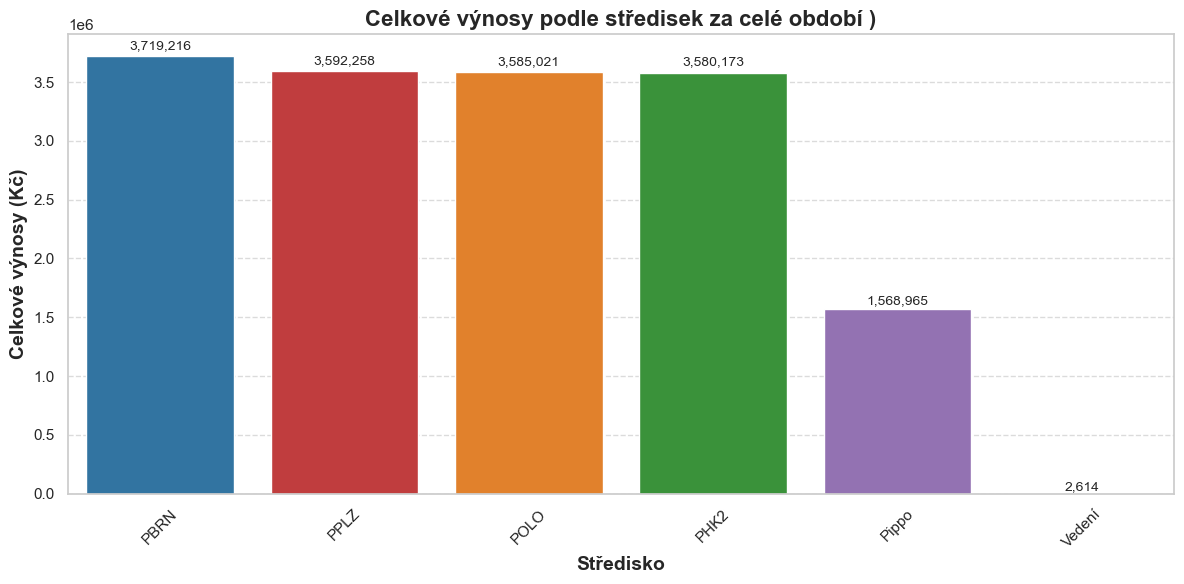

In [30]:
y)
vynosy = gl_data[
    (gl_data['MD'].astype(str).str.startswith('6')) | (gl_data['DAL'].astype(str).str.startswith('6'))
]

vynosy_strediska = vynosy.groupby('Středisko')['Částka'].sum()
vynosy_strediska = vynosy_strediska.drop(['eshop', 'David'], errors='ignore')


vynosy_strediska = vynosy_strediska.sort_values(ascending=False)
strediska_colors = {
    'PBRN': '#1f77b4',  
    'PHK2': '#2ca02c',  
    'POLO': '#ff7f0e',   
    'PPLZ': '#d62728',   
    'Pippo': '#9467bd', 
    'Vedení': '#17becf',
    'Unknown': '#bcbd22' 
}


vynosy_colors = [strediska_colors.get(stredisko, '#333333') for stredisko in vynosy_strediska.index]


sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))


barplot = sns.barplot(
    x=vynosy_strediska.index, 
    y=vynosy_strediska.values, 
    palette=vynosy_colors
)

for index, value in enumerate(vynosy_strediska.values):
    plt.text(index, value + (value * 0.01), f'{value:,.0f}', ha='center', va='bottom', fontsize=10)

plt.xlabel('Středisko', fontsize=14, fontweight='bold')
plt.ylabel('Celkové výnosy (Kč)', fontsize=14, fontweight='bold')
plt.title('Celkové výnosy podle středisek za celé období )', fontsize=16, fontweight='bold')

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


/var/folders/x0/jzgppjhs6dgfl1lhhvbv5x300000gn/T/ipykernel_42848/4135801043.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


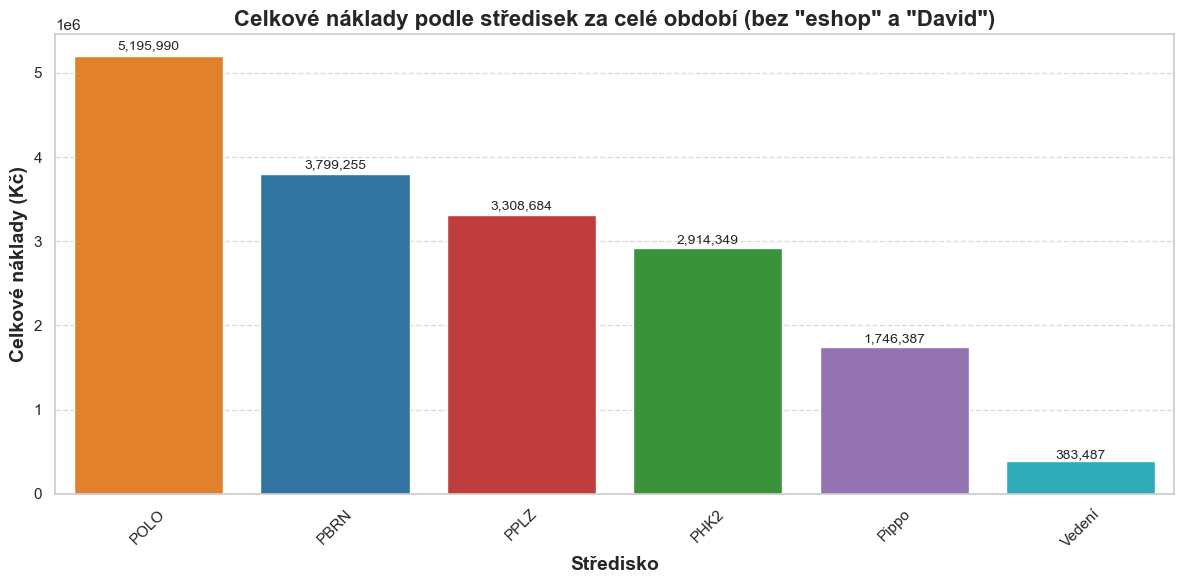

In [38]:


naklady = gl_data[
    (gl_data['MD'].astype(str).str.startswith('5')) | (gl_data['DAL'].astype(str).str.startswith('5'))
]

naklady_strediska = naklady.groupby('Středisko')['Částka'].sum()
naklady_strediska = naklady_strediska.drop(['eshop', 'David'], errors='ignore')

naklady_strediska = naklady_strediska.sort_values(ascending=False)



naklady_colors = [strediska_colors.get(stredisko, '#333333') for stredisko in naklady_strediska.index]

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

barplot = sns.barplot(
    x=naklady_strediska.index, 
    y=naklady_strediska.values, 
    palette=naklady_colors
)

for index, value in enumerate(naklady_strediska.values):
    plt.text(index, value + (value * 0.01), f'{value:,.0f}', ha='center', va='bottom', fontsize=10)

plt.xlabel('Středisko', fontsize=14, fontweight='bold')
plt.ylabel('Celkové náklady (Kč)', fontsize=14, fontweight='bold')
plt.title('Celkové náklady podle středisek za celé období (bez "eshop" a "David")', fontsize=16, fontweight='bold')

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


<Figure size 1200x600 with 0 Axes>

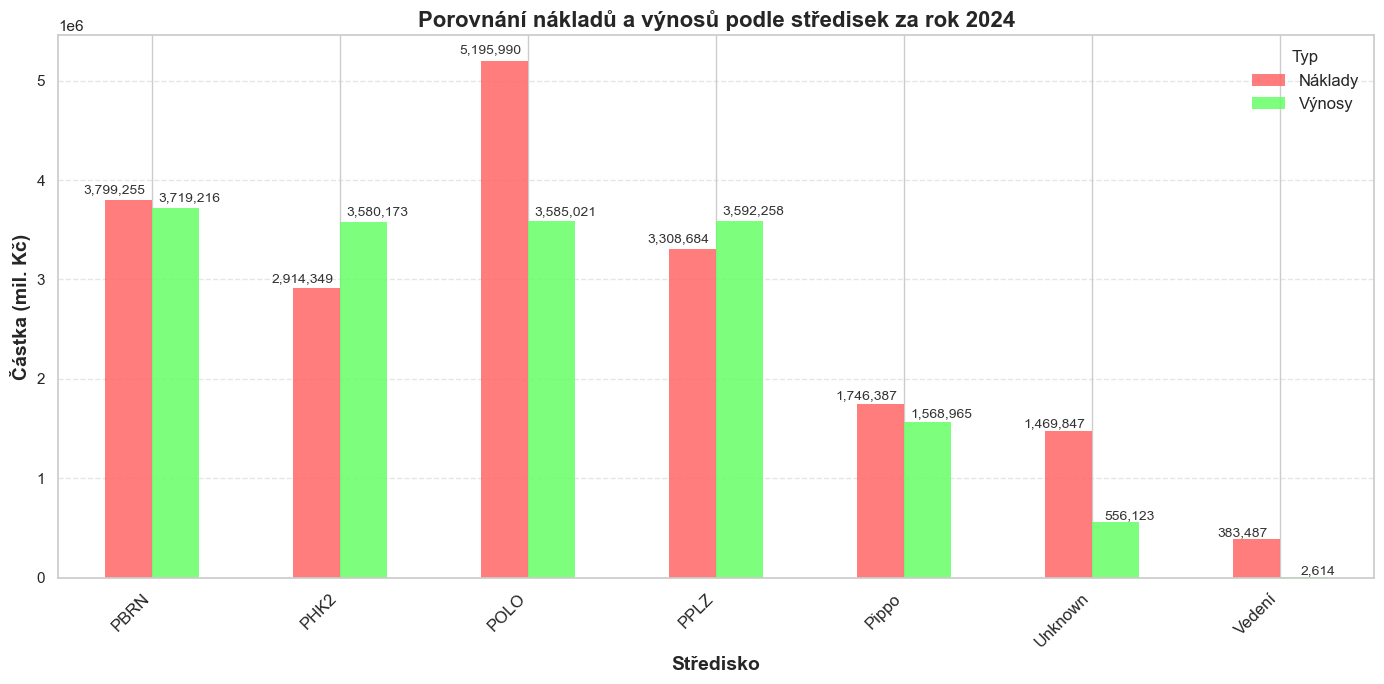

In [40]:

gl_data = gl_data[gl_data['Datum'].dt.year == 2024]


naklady['Středisko'] = naklady['Středisko'].fillna('Unknown')
vynosy['Středisko'] = vynosy['Středisko'].fillna('Unknown')

naklady_strediska = naklady.groupby('Středisko')['Částka'].sum().drop(['eshop', 'David'], errors='ignore')
vynosy_strediska = vynosy.groupby('Středisko')['Částka'].sum().drop(['eshop', 'David'], errors='ignore')

data_combined = pd.DataFrame({
    'Náklady': naklady_strediska,
    'Výnosy': vynosy_strediska
}).fillna(0)



sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

data_combined.plot(
    kind='bar', 
    color=['#ff6666', '#66ff66'], 
    edgecolor='none', 
    figsize=(14, 7), 
    alpha=0.85
)


for index, value in enumerate(data_combined['Náklady']):
    plt.text(index - 0.2, value + (value * 0.01), f'{value:,.0f}', ha='center', va='bottom', fontsize=10, color='#333333')
for index, value in enumerate(data_combined['Výnosy']):
    plt.text(index + 0.2, value + (value * 0.01), f'{value:,.0f}', ha='center', va='bottom', fontsize=10, color='#333333')

plt.xlabel('Středisko', fontsize=14, fontweight='bold')
plt.ylabel('Částka (mil. Kč)', fontsize=14, fontweight='bold')
plt.title('Porovnání nákladů a výnosů podle středisek za rok 2024', fontsize=16, fontweight='bold')
plt.legend(title='Typ', fontsize=12, frameon=False)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()


/var/folders/x0/jzgppjhs6dgfl1lhhvbv5x300000gn/T/ipykernel_42848/1417828482.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  naklady['Středisko'] = naklady['Středisko'].fillna('Unknown')
/var/folders/x0/jzgppjhs6dgfl1lhhvbv5x300000gn/T/ipykernel_42848/1417828482.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vynosy['Středisko'] = vynosy['Středisko'].fillna('Unknown')


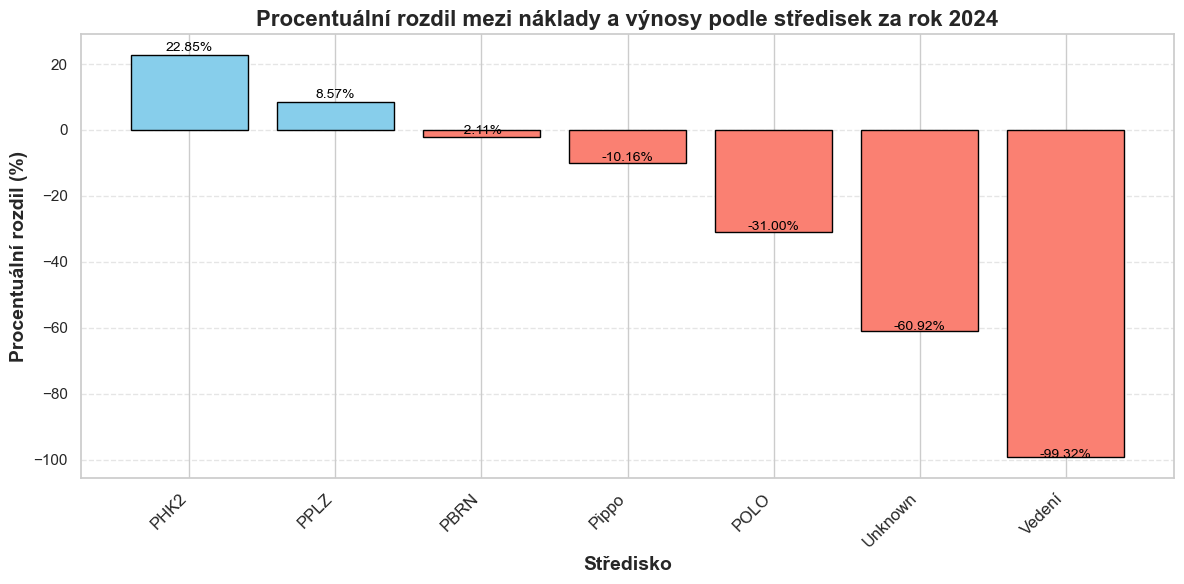

In [42]:


gl_data['Datum'] = pd.to_datetime(gl_data['Datum'])
gl_data = gl_data[gl_data['Datum'].dt.year == 2024]

naklady = gl_data[(gl_data['MD'].astype(str).str.startswith('5')) | (gl_data['DAL'].astype(str).str.startswith('5'))]
vynosy = gl_data[(gl_data['MD'].astype(str).str.startswith('6')) | (gl_data['DAL'].astype(str).str.startswith('6'))]

naklady['Středisko'] = naklady['Středisko'].fillna('Unknown')
vynosy['Středisko'] = vynosy['Středisko'].fillna('Unknown')

naklady_strediska = naklady.groupby('Středisko')['Částka'].sum().drop(['eshop', 'David'], errors='ignore')
vynosy_strediska = vynosy.groupby('Středisko')['Částka'].sum().drop(['eshop', 'David'], errors='ignore')

data_combined = pd.DataFrame({
    'Náklady': naklady_strediska,
    'Výnosy': vynosy_strediska
}).fillna(0)

data_combined['Procentuální změna'] = ((data_combined['Výnosy'] - data_combined['Náklady']) / data_combined['Náklady']) * 100

data_combined = data_combined.sort_values(by='Procentuální změna', ascending=False)

bar_colors = ['skyblue' if x >= 0 else 'salmon' for x in data_combined['Procentuální změna']]

plt.figure(figsize=(12, 6))
plt.bar(data_combined.index, data_combined['Procentuální změna'], color=bar_colors, edgecolor='black')

for index, value in enumerate(data_combined['Procentuální změna']):
    plt.text(index, value + (value * 0.01), f'{value:.2f}%', ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Středisko', fontsize=14, fontweight='bold')
plt.ylabel('Procentuální rozdil (%)', fontsize=14, fontweight='bold')
plt.title('Procentuální rozdil mezi náklady a výnosy podle středisek za rok 2024', fontsize=16, fontweight='bold')

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()


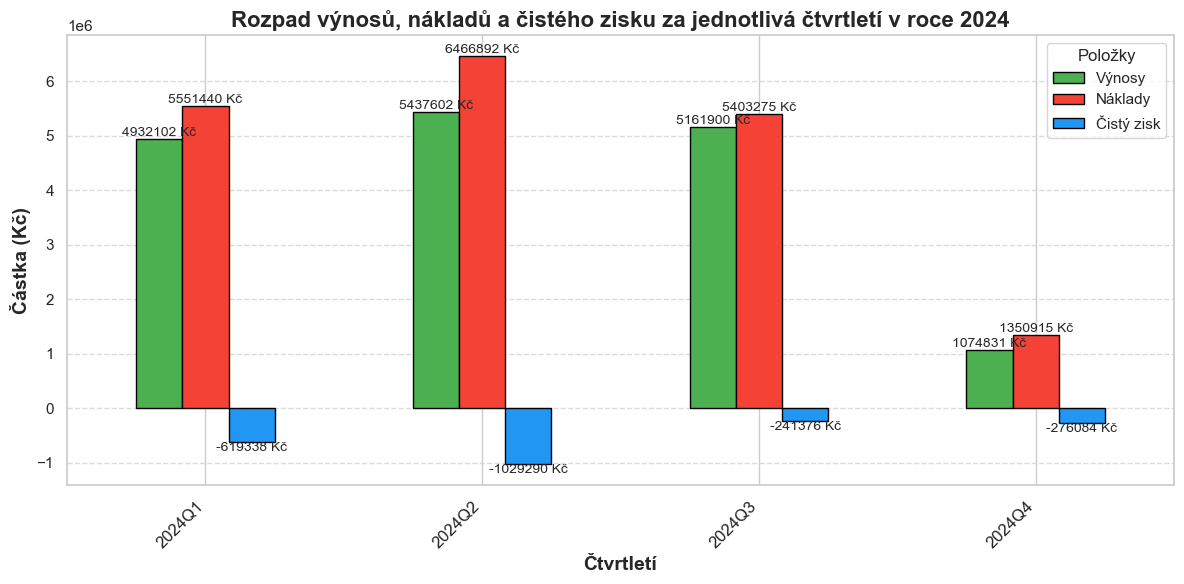

In [44]:


gl_data['Datum'] = pd.to_datetime(gl_data['Datum'])
gl_data = gl_data[gl_data['Datum'].dt.year == 2024]

gl_data['Čtvrtletí'] = gl_data['Datum'].dt.to_period('Q')


naklady = gl_data[(gl_data['MD'].astype(str).str.startswith('5')) | (gl_data['DAL'].astype(str).str.startswith('5'))]
vynosy = gl_data[(gl_data['MD'].astype(str).str.startswith('6')) | (gl_data['DAL'].astype(str).str.startswith('6'))]

naklady_ctvrtleti = naklady.groupby('Čtvrtletí')['Částka'].sum()
vynosy_ctvrtleti = vynosy.groupby('Čtvrtletí')['Částka'].sum()
cisty_zisk_ctvrtleti = vynosy_ctvrtleti - naklady_ctvrtleti

data_ctvrtleti = pd.DataFrame({
    'Výnosy': vynosy_ctvrtleti,
    'Náklady': naklady_ctvrtleti,
    'Čistý zisk': cisty_zisk_ctvrtleti
}).fillna(0)

fig, ax = plt.subplots(figsize=(12, 6))

data_ctvrtleti.plot(kind='bar', ax=ax, color=['#4CAF50', '#F44336', '#2196F3'], edgecolor='black')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f Kč', label_type='edge', fontsize=10)

ax.set_xlabel('Čtvrtletí', fontsize=14, fontweight='bold')
ax.set_ylabel('Částka (Kč)', fontsize=14, fontweight='bold')
ax.set_title('Rozpad výnosů, nákladů a čistého zisku za jednotlivá čtvrtletí v roce 2024', fontsize=16, fontweight='bold')

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Položky', loc='upper right')

plt.tight_layout()
plt.show()


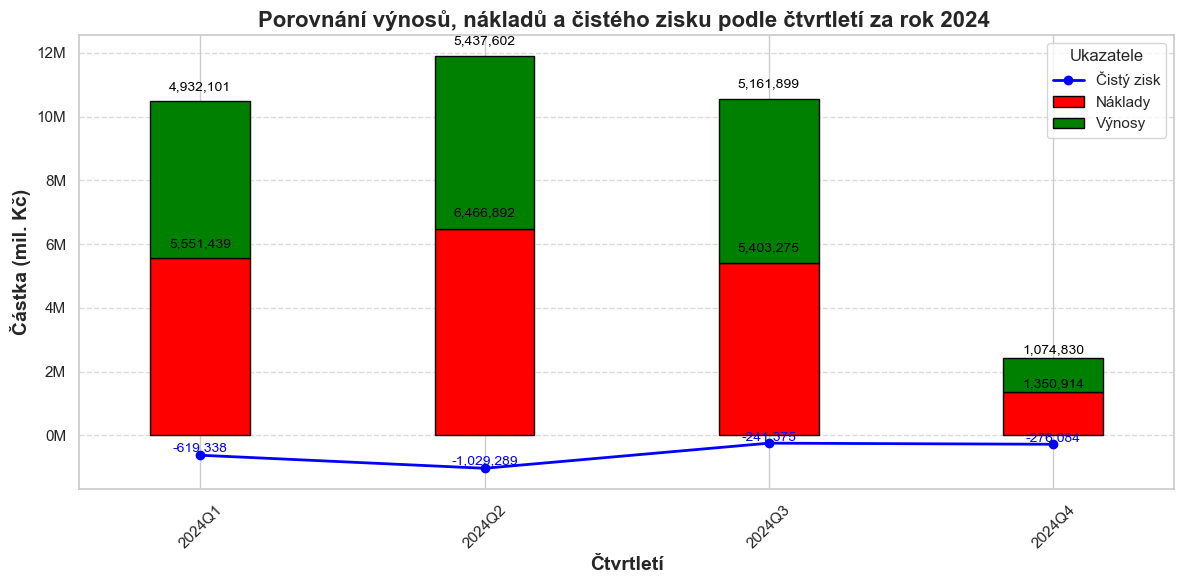

In [46]:

naklady_ctvrtleti = naklady.groupby(naklady['Datum'].dt.to_period('Q'))['Částka'].sum()
vynosy_ctvrtleti = vynosy.groupby(vynosy['Datum'].dt.to_period('Q'))['Částka'].sum()

cisty_zisk_ctvrtleti = vynosy_ctvrtleti - naklady_ctvrtleti

data_combined = pd.DataFrame({
    'Výnosy': vynosy_ctvrtleti,
    'Náklady': naklady_ctvrtleti,
    'Čistý zisk': cisty_zisk_ctvrtleti
}).fillna(0)

fig, ax = plt.subplots(figsize=(12, 6))
width = 0.35  
data_combined[['Náklady', 'Výnosy']].plot(kind='bar', stacked=True, color=['red', 'green'], edgecolor='black', ax=ax, width=width)

ax.plot(data_combined.index.astype(str), data_combined['Čistý zisk'], marker='o', color='blue', label='Čistý zisk', linewidth=2)

for i, (vyk, nak) in enumerate(zip(data_combined['Výnosy'], data_combined['Náklady'])):
    ax.text(i, vyk + nak + 0.05 * vyk, f'{int(vyk):,}', ha='center', va='bottom', color='black', fontsize=10)
    ax.text(i, nak + 0.05 * nak, f'{int(nak):,}', ha='center', va='bottom', color='black', fontsize=10)

for i, zisk in enumerate(data_combined['Čistý zisk']):
    ax.text(i, zisk + (0.05 * abs(zisk)), f'{int(zisk):,}', ha='center', va='bottom', color='blue', fontsize=10)

plt.xlabel('Čtvrtletí', fontsize=14, fontweight='bold')
plt.ylabel('Částka (mil. Kč)', fontsize=14, fontweight='bold')
plt.title('Porovnání výnosů, nákladů a čistého zisku podle čtvrtletí za rok 2024 ', fontsize=16, fontweight='bold')

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x / 1_000_000)}M'))

plt.legend(['Čistý zisk', 'Náklady', 'Výnosy'], loc='upper right', title='Ukazatele')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()


/var/folders/x0/jzgppjhs6dgfl1lhhvbv5x300000gn/T/ipykernel_42848/1111919528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  naklady['Měsíc'] = naklady['Datum'].dt.to_period('M')
/var/folders/x0/jzgppjhs6dgfl1lhhvbv5x300000gn/T/ipykernel_42848/1111919528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vynosy['Měsíc'] = vynosy['Datum'].dt.to_period('M')


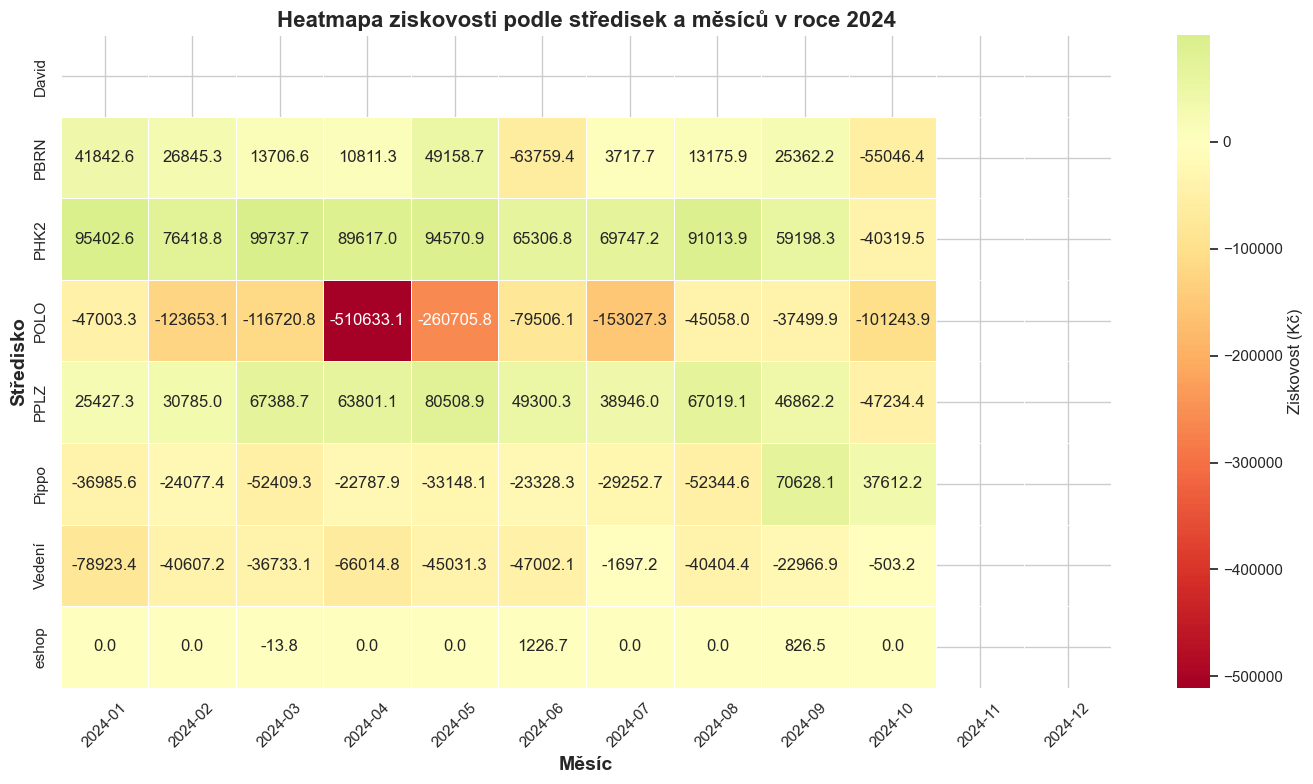

In [48]:

naklady['Měsíc'] = naklady['Datum'].dt.to_period('M')
vynosy['Měsíc'] = vynosy['Datum'].dt.to_period('M')

naklady_strediska_mesic = naklady.groupby(['Měsíc', 'Středisko'])['Částka'].sum().unstack(fill_value=0)
vynosy_strediska_mesic = vynosy.groupby(['Měsíc', 'Středisko'])['Částka'].sum().unstack(fill_value=0)

ziskovost_strediska_mesic = vynosy_strediska_mesic - naklady_strediska_mesic

plt.figure(figsize=(14, 8))
sns.heatmap(
    ziskovost_strediska_mesic.T, 
    annot=True, fmt=".1f", cmap="RdYlGn", center=0, linewidths=0.5,
    cbar_kws={'label': 'Ziskovost (Kč)'}
)

plt.title('Heatmapa ziskovosti podle středisek a měsíců v roce 2024', fontsize=16, fontweight='bold')
plt.xlabel('Měsíc', fontsize=14, fontweight='bold')
plt.ylabel('Středisko', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [50]:

naklady_md = gl_data[gl_data['MD'].astype(str).str.startswith('5')]
naklady_dal = gl_data[gl_data['DAL'].astype(str).str.startswith('5')]


merged_md = naklady_md.merge(coa_data, left_on='MD', right_on='Číslo účtu', how='left')
merged_dal = naklady_dal.merge(coa_data, left_on='DAL', right_on='Číslo účtu', how='left')

merged_naklady = pd.concat([merged_md, merged_dal])

top_5_nakladove_ucty = merged_naklady.groupby(['Číslo účtu', 'Název'])['Částka'].sum().sort_values(ascending=False).head(5)

print("Top 5 nejnákladnějších účtů:")
print(top_5_nakladove_ucty)


Top 5 nejnákladnějších účtů:
Číslo účtu  Název                                 
504000      Prodané zboží                             8740715.51
521000      Mzdové náklady                            2990099.00
518003      Nájemné prostor                           1645099.74
524000      Zákonné sociální a zdravotní pojištění     758969.00
502000      Spotřeba energie                           750152.56
Name: Částka, dtype: float64


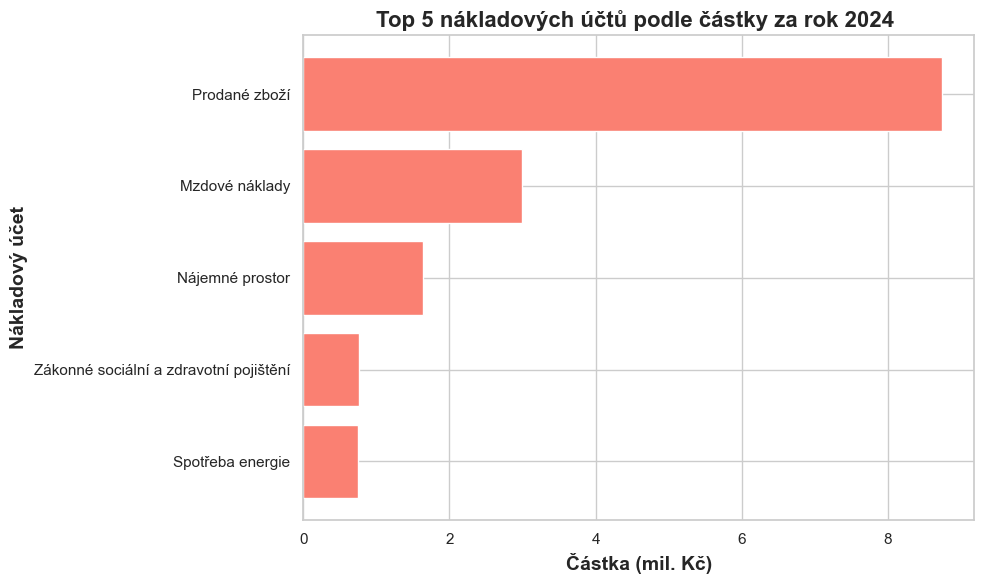

In [52]:

merged_md = naklady_md.merge(coa_data, left_on='MD', right_on='Číslo účtu', how='left')
merged_dal = naklady_dal.merge(coa_data, left_on='DAL', right_on='Číslo účtu', how='left')

merged_naklady = pd.concat([merged_md, merged_dal])

top_5_nakladove_ucty = (
    merged_naklady.groupby(['Číslo účtu', 'Název'])['Částka']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .reset_index()
)

top_5_nakladove_ucty['Částka'] = top_5_nakladove_ucty['Částka'] / 1e6

plt.figure(figsize=(10, 6))
plt.barh(top_5_nakladove_ucty['Název'], top_5_nakladove_ucty['Částka'], color='salmon')
plt.xlabel('Částka (mil. Kč)', fontsize=14, fontweight='bold')
plt.ylabel('Nákladový účet', fontsize=14, fontweight='bold')
plt.title('Top 5 nákladových účtů podle částky za rok 2024 ', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis() 
plt.tight_layout()

plt.show()


/var/folders/x0/jzgppjhs6dgfl1lhhvbv5x300000gn/T/ipykernel_42848/318704855.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_data.loc[:, 'Měsíc'] = top_5_data['Datum'].dt.to_period('M')


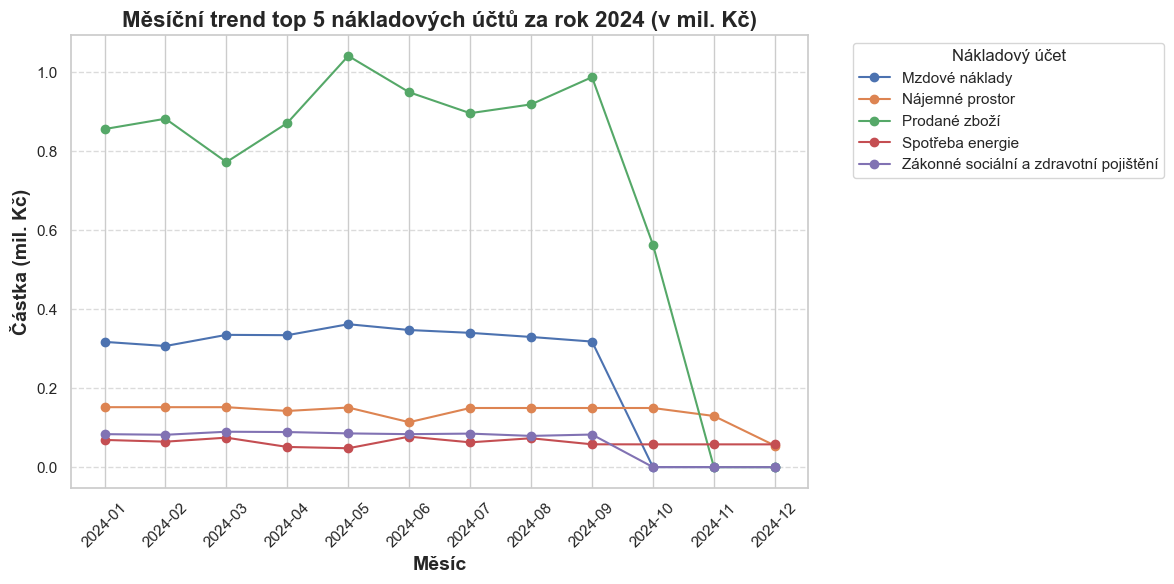

In [54]:

merged_md = naklady_md.merge(coa_data, left_on='MD', right_on='Číslo účtu', how='left')
merged_dal = naklady_dal.merge(coa_data, left_on='DAL', right_on='Číslo účtu', how='left')


merged_naklady = pd.concat([merged_md, merged_dal])

top_5_nakladove_ucty = (
    merged_naklady.groupby(['Číslo účtu', 'Název'])['Částka']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index.get_level_values(0)
)

top_5_data = merged_naklady[merged_naklady['Číslo účtu'].isin(top_5_nakladove_ucty)]

top_5_data.loc[:, 'Měsíc'] = top_5_data['Datum'].dt.to_period('M')

monthly_top_5 = top_5_data.groupby(['Měsíc', 'Název'])['Částka'].sum().unstack().fillna(0)

monthly_top_5 = monthly_top_5 / 1e6

plt.figure(figsize=(12, 6))
for column in monthly_top_5.columns:
    plt.plot(monthly_top_5.index.astype(str), monthly_top_5[column], marker='o', label=column)

# Setting labels and title
plt.xlabel('Měsíc', fontsize=14, fontweight='bold')
plt.ylabel('Částka (mil. Kč)', fontsize=14, fontweight='bold')
plt.title('Měsíční trend top 5 nákladových účtů za rok 2024 (v mil. Kč)', fontsize=16, fontweight='bold')
plt.legend(title='Nákladový účet', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the chart
plt.show()


Vyberte kritéria pro zobrazení Nákladů, Výnosů a Čistého zisku.


Vyberte Středisko ['Vše', 'David', 'Jana', 'PBRN', 'PHK2', 'POLO', 'PPLZ', 'Pippo', 'Vedení', 'eshop']:  PHK2
Vyberte Měsíc ['Vše', '2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06', '2024-07', '2024-08', '2024-09', '2024-10', '2024-11', '2024-12']:  2024-02
Vyberte Číslo účtu ['Vše', '131000', '132000', '211400', '221001', '221003', '221004', '261000', '311000', '314000', '315200', '315210', '315220', '315230', '321000', '325000', '331000', '343000', '501000', '501200', '502000', '504000', '504700', '504800', '518003', '518011', '518808', '521000', '524000', '548000']:  548000



Výsledky pro vybraná kritéria:
Středisko: PHK2
Měsíc: 2024-02
Číslo účtu: 548000
Náklady: -0.82 Kč
Výnosy: 0.00 Kč
Čistý zisk: 0.82 Kč


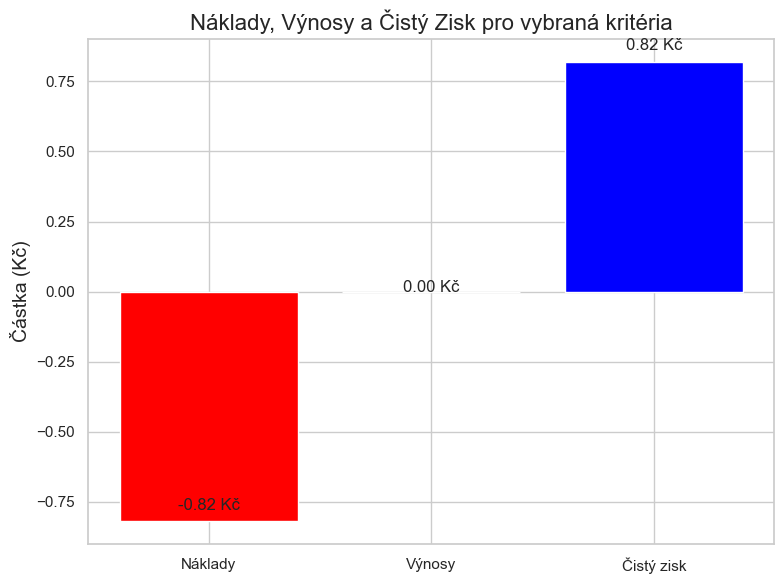

In [ ]:

gl_data['Datum'] = pd.to_datetime(gl_data['Datum'])

gl_data['Měsíc'] = gl_data['Datum'].dt.to_period('M')


merged_data = gl_data.merge(coa_data, left_on='MD', right_on='Číslo účtu', how='left', suffixes=('', '_MD'))
merged_data = merged_data.merge(coa_data, left_on='DAL', right_on='Číslo účtu', how='left', suffixes=('', '_DAL'))

def display_results():
    strediska_list = ['Vše'] + sorted(merged_data['Středisko'].dropna().unique())
    mesice_list = ['Vše'] + sorted(merged_data['Měsíc'].astype(str).unique())
    ucty_list = ['Vše'] + sorted(coa_data[coa_data['Číslo účtu'].astype(str).str.startswith(('5', '6'))]['Číslo účtu'].astype(str).unique())

    print("Vyberte kritéria pro zobrazení Nákladů, Výnosů a Čistého zisku.")

    while True:
        stredisko = input(f"Vyberte Středisko {strediska_list}: ")
        if stredisko == 'Vše' or stredisko in strediska_list:
            break
        else:
            print("Neplatná volba. Zkuste znovu.")

    if stredisko != 'Vše':
        mesice_list = ['Vše'] + sorted(merged_data[merged_data['Středisko'] == stredisko]['Měsíc'].astype(str).unique())

    while True:
        mesic = input(f"Vyberte Měsíc {mesice_list}: ")
        if mesic == 'Vše' or mesic in mesice_list:
            break
        else:
            print("Neplatná volba. Zkuste znovu.")

    filtered_data = merged_data.copy()
    if stredisko != 'Vše':
        filtered_data = filtered_data[filtered_data['Středisko'] == stredisko]
    if mesic != 'Vše':
        filtered_data = filtered_data[filtered_data['Měsíc'] == mesic]

    ucty_list = ['Vše'] + sorted(filtered_data['MD'].astype(str).unique())

    while True:
        ucet = input(f"Vyberte Číslo účtu {ucty_list}: ")
        if ucet == 'Vše' or ucet in ucty_list:
            break
        else:
            print("Neplatná volba. Zkuste znovu.")

    display_data = merged_data.copy()
    if stredisko != 'Vše':
        display_data = display_data[display_data['Středisko'] == stredisko]
    if mesic != 'Vše':
        display_data = display_data[display_data['Měsíc'] == mesic]
    if ucet != 'Vše':
        display_data = display_data[
            (display_data['MD'].astype(str) == ucet) | (display_data['DAL'].astype(str) == ucet)
        ]

    costs = display_data[(display_data['MD'].astype(str).str.startswith('5')) | (display_data['DAL'].astype(str).str.startswith('5'))]['Částka'].sum()
    revenues = display_data[(display_data['MD'].astype(str).str.startswith('6')) | (display_data['DAL'].astype(str).str.startswith('6'))]['Částka'].sum()
    net_profit = revenues - costs

    if costs == 0 and revenues == 0:
        print("Kombinace kritérií nemá žádné dostupné záznamy.")
    else:
        print("\nVýsledky pro vybraná kritéria:")
        print(f"Středisko: {stredisko if stredisko != 'Vše' else 'Vše'}")
        print(f"Měsíc: {mesic if mesic != 'Vše' else 'Vše'}")
        print(f"Číslo účtu: {ucet if ucet != 'Vše' else 'Vše'}")
        print(f"Náklady: {costs:,.2f} Kč")
        print(f"Výnosy: {revenues:,.2f} Kč")
        print(f"Čistý zisk: {net_profit:,.2f} Kč")

        plt.figure(figsize=(8, 6))
        plt.bar(['Náklady', 'Výnosy', 'Čistý zisk'], [costs, revenues, net_profit], color=['red', 'green', 'blue'])
        plt.ylabel('Částka (Kč)', fontsize=14)
        plt.title('Náklady, Výnosy a Čistý Zisk pro vybraná kritéria', fontsize=16)
        for index, value in enumerate([costs, revenues, net_profit]):
            plt.text(index, value + 0.05 * abs(value), f'{value:,.2f} Kč', ha='center', fontsize=12)
        plt.tight_layout()
        plt.show()

while True:
    display_results()
    retry = input("\nChcete zkusit jiná kritéria? (ano/ne): ").strip().lower()
    if retry != 'ano':
        print("Děkujeme, že jste použili program.")
        break


In [ ]:

filtered_data = gl_data[
    gl_data['MD'].astype(str).str.startswith(('5', '6')) | 
    gl_data['DAL'].astype(str).str.startswith(('5', '6'))
]

filtered_data.to_excel('/Users/katarinabaksiova/Desktop/partory/filtered_5_and_6_accounts.xlsx', index=False)

print("Data with accounts starting with '5' and '6' in MD or DAL have been exported to 'filtered_5_and_6_accounts.xlsx'")
